In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

data = pd.read_csv('../data/Start_up_data.csv', encoding= 'unicode_escape')

In [2]:
data = data.iloc[:49438]

In [3]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
data = data.dropna(subset=['name'])
data['homepage_url'] = data['homepage_url'].fillna('Website not Provided')
columns_to_remove = [
    'permalink', 'state_code', 'region', 'city', 'founded_month',
    'founded_quarter', 'founded_year', 'seed', 'venture', 'equity_crowdfunding',
    'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market',
    'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E',
    'round_F', 'round_G', 'round_H'
]
data = data.drop(columns=columns_to_remove, axis=1)

In [4]:
data.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at'],
      dtype='object')

In [5]:
data = data.dropna(subset=['market'])
data = data.dropna(subset=['status'])

In [6]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data.loc[data['country_code'] != 'USA', 'country_code'] = 'Other'

In [7]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
datagroup = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [8]:
import re 
data['Industry_Group'] = pd.np.where(data.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(data.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(data.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(data.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(data.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(data.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(data.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(data.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(data.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(data.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(data.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(data.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(data.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(data.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(data.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(data.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(data.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(data.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(data.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(data.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(data.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(data.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(data.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(data.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(data.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(data.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(data.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(data.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(data.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(data.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(data.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(data.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(data.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(data.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(data.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(data.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(data.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(data.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(data.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(data.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(data.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(data.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(data.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(data.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(data.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(data.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(data.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

/tmp/ipykernel_5203/3623873125.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['Industry_Group'] = pd.np.where(data.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
/tmp/ipykernel_5203/3623873125.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/tmp/ipykernel_5203/3623873125.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pd.np.where(data.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software",
/tmp/ipykernel_5203/3623873125.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly i

/tmp/ipykernel_5203/3623873125.py:31: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication",
/tmp/ipykernel_5203/3623873125.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile",
/tmp/ipykernel_5203/3623873125.py:33: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(data.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio",
/tmp/ipykernel_5203/3623873125.py:34: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.whe

In [9]:
data['Industry_Group'].nunique()

43

In [10]:
data = data[data['funding_total_usd'] != ' -   ']
data = data.reset_index(drop=True)
data = data.drop_duplicates(subset=['name', 'homepage_url', 'Industry_Group'])

In [11]:
#data[data[['name', 'homepage_url', 'Industry_Group']].duplicated()]

In [12]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,1,6/1/12,6/30/12,6/30/12,Content and Publishing
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,2,NaN,6/4/10,9/23/10,Gaming
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,Other,1,10/26/12,8/9/12,8/9/12,Content and Publishing
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,Other,1,4/1/11,4/1/11,4/1/11,Consumer Electronics
4,-R- Ranch and Mine,Website not Provided,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,2,1/1/14,8/17/14,9/26/14,Travel and Tourism
...,...,...,...,...,...,...,...,...,...,...,...,...
37581,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,Other,1,1/28/13,3/24/14,3/24/14,Education
37582,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,Other,1,NaN,4/1/12,4/1/12,Software
37583,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,Other,5,5/13/12,11/1/11,9/10/14,Software
37584,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,Other,1,NaN,11/21/11,11/21/11,Gaming


In [13]:
data.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at', 'Industry_Group'],
      dtype='object')

In [14]:
columns_to_save = ['funding_total_usd',
       'status', 'country_code', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at', 'Industry_Group']
data = data[columns_to_save]

In [15]:
data[['Industry_Group']].value_counts()

Industry_Group                 
Software                           7634
Biotechnology                      3453
Health Care                        2639
Internet Services                  2485
Commerce and Shopping              2093
Information Technology             1877
Mobile                             1777
Community and Lifestyle            1542
Other                              1511
Advertising                        1494
Financial Services                 1136
Media and Entertainment            1123
Gaming                             1110
Education                           861
Professional Services               779
Content and Publishing              726
Manufacturing                       569
Privacy and Security                522
Real Estate                         428
Transportation                      381
Travel and Tourism                  357
Hardware                            327
Data and Analytics                  325
Consumer Electronics                312
Clothing

In [16]:
data['time_between_first_last_funding'] = (pd.to_datetime(data['last_funding_at'], format='%m/%d/%y', errors="coerce") - pd.to_datetime(data['first_funding_at'], errors="coerce")).dt.days

/tmp/ipykernel_5203/1655532358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_between_first_last_funding'] = (pd.to_datetime(data['last_funding_at'], format='%m/%d/%y', errors="coerce") - pd.to_datetime(data['first_funding_at'], errors="coerce")).dt.days


In [17]:
data.isna().sum()

funding_total_usd                     0
status                                0
country_code                          0
funding_rounds                        0
founded_at                         7183
first_funding_at                      0
last_funding_at                       0
Industry_Group                        0
time_between_first_last_funding       2
dtype: int64

In [18]:
data['founded_at'].fillna(data['first_funding_at'], inplace=True)

/tmp/ipykernel_5203/432439885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['founded_at'].fillna(data['first_funding_at'], inplace=True)


In [19]:
data.isna().sum()

funding_total_usd                  0
status                             0
country_code                       0
funding_rounds                     0
founded_at                         0
first_funding_at                   0
last_funding_at                    0
Industry_Group                     0
time_between_first_last_funding    2
dtype: int64

In [20]:
data.dropna(subset=['time_between_first_last_funding'], inplace=True)

/tmp/ipykernel_5203/2608717703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['time_between_first_last_funding'], inplace=True)


In [21]:
#most_recent_date = pd.to_datetime(data['last_funding_at'], format='%m/%d/%y', errors="coerce").max()
#data['years_in_business'] = (pd.to_datetime(data['last_funding_at'], format='%m/%d/%y', errors="coerce") - pd.to_datetime(data['founded_at'], errors="coerce")).dt.days

In [22]:
# Convert date columns to datetime with the correct format
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
data[date_columns] = data[date_columns].apply(pd.to_datetime, format='%m/%d/%y', errors='coerce')
# Filter out rows with NaT values (invalid dates)
data = data.dropna(subset=date_columns, how='any')
data

/tmp/ipykernel_5203/650595994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_columns] = data[date_columns].apply(pd.to_datetime, format='%m/%d/%y', errors='coerce')


,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group,time_between_first_last_funding
0,1750000,acquired,USA,1,2012-06-01,2012-06-30,2012-06-30,Content and Publishing,0.0
1,4000000,operating,USA,2,2010-06-04,2010-06-04,2010-09-23,Gaming,111.0
2,40000,operating,Other,1,2012-10-26,2012-08-09,2012-08-09,Content and Publishing,0.0
3,1500000,operating,Other,1,2011-04-01,2011-04-01,2011-04-01,Consumer Electronics,0.0
4,60000,operating,USA,2,2014-01-01,2014-08-17,2014-09-26,Travel and Tourism,40.0
...,...,...,...,...,...,...,...,...,...
37581,320000,operating,Other,1,2013-01-28,2014-03-24,2014-03-24,Education,0.0
37582,1587301,operating,Other,1,2012-04-01,2012-04-01,2012-04-01,Software,0.0
37583,97398,operating,Other,5,2012-05-13,2011-11-01,2014-09-10,Software,1044.0
37584,9300000,operating,Other,1,2011-11-21,2011-11-21,2011-11-21,Gaming,0.0


In [23]:
#data[['founded_at']].hist()

In [24]:
#data[data['time_between_first_last_funding'] >= 0]

In [25]:
start_date = '1990-01-01'
end_date = '2015-12-30'

# Select DataFrame rows between two dates
mask1 = (data['founded_at'] > start_date) & (data['founded_at'] <= end_date)
data = data.loc[mask1]

In [26]:
mask2 = (data['first_funding_at'] > start_date) & (data['first_funding_at'] <= end_date) & (data['last_funding_at'] > start_date) & (data['last_funding_at'] <= end_date)
data = data.loc[mask2]

In [27]:
data = data[data['first_funding_at'] <= data['last_funding_at']]

In [28]:
reference_date = pd.to_datetime(end_date)

In [29]:
data['days_in_business'] = (reference_date - data['founded_at']).dt.days

In [30]:
data = data.reset_index(drop=True)

In [31]:
data = data.drop(columns=['founded_at', 'first_funding_at', 'last_funding_at'])

In [32]:
data

,funding_total_usd,status,country_code,funding_rounds,Industry_Group,time_between_first_last_funding,days_in_business
0,1750000,acquired,USA,1,Content and Publishing,0.0,1307
1,4000000,operating,USA,2,Gaming,111.0,2035
2,40000,operating,Other,1,Content and Publishing,0.0,1160
3,1500000,operating,Other,1,Consumer Electronics,0.0,1734
4,60000,operating,USA,2,Travel and Tourism,40.0,728
...,...,...,...,...,...,...,...
36782,320000,operating,Other,1,Education,0.0,1066
36783,1587301,operating,Other,1,Software,0.0,1368
36784,97398,operating,Other,5,Software,1044.0,1326
36785,9300000,operating,Other,1,Gaming,0.0,1500


In [33]:
data.dtypes

funding_total_usd                   object
status                              object
country_code                        object
funding_rounds                       int64
Industry_Group                      object
time_between_first_last_funding    float64
days_in_business                     int64
dtype: object

In [34]:
#change to numeric 
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
# Convert 'time_between_first_last_funding' column to integer
data['time_between_first_last_funding'] = data['time_between_first_last_funding'].astype('Int64')
data['funding_rounds'] = data['funding_rounds'].astype('Int64', errors='ignore')

In [35]:
data

,funding_total_usd,status,country_code,funding_rounds,Industry_Group,time_between_first_last_funding,days_in_business
0,1750000,acquired,USA,1,Content and Publishing,0,1307
1,4000000,operating,USA,2,Gaming,111,2035
2,40000,operating,Other,1,Content and Publishing,0,1160
3,1500000,operating,Other,1,Consumer Electronics,0,1734
4,60000,operating,USA,2,Travel and Tourism,40,728
...,...,...,...,...,...,...,...
36782,320000,operating,Other,1,Education,0,1066
36783,1587301,operating,Other,1,Software,0,1368
36784,97398,operating,Other,5,Software,1044,1326
36785,9300000,operating,Other,1,Gaming,0,1500


In [36]:
data.dtypes

funding_total_usd                   int64
status                             object
country_code                       object
funding_rounds                      Int64
Industry_Group                     object
time_between_first_last_funding     Int64
days_in_business                    int64
dtype: object

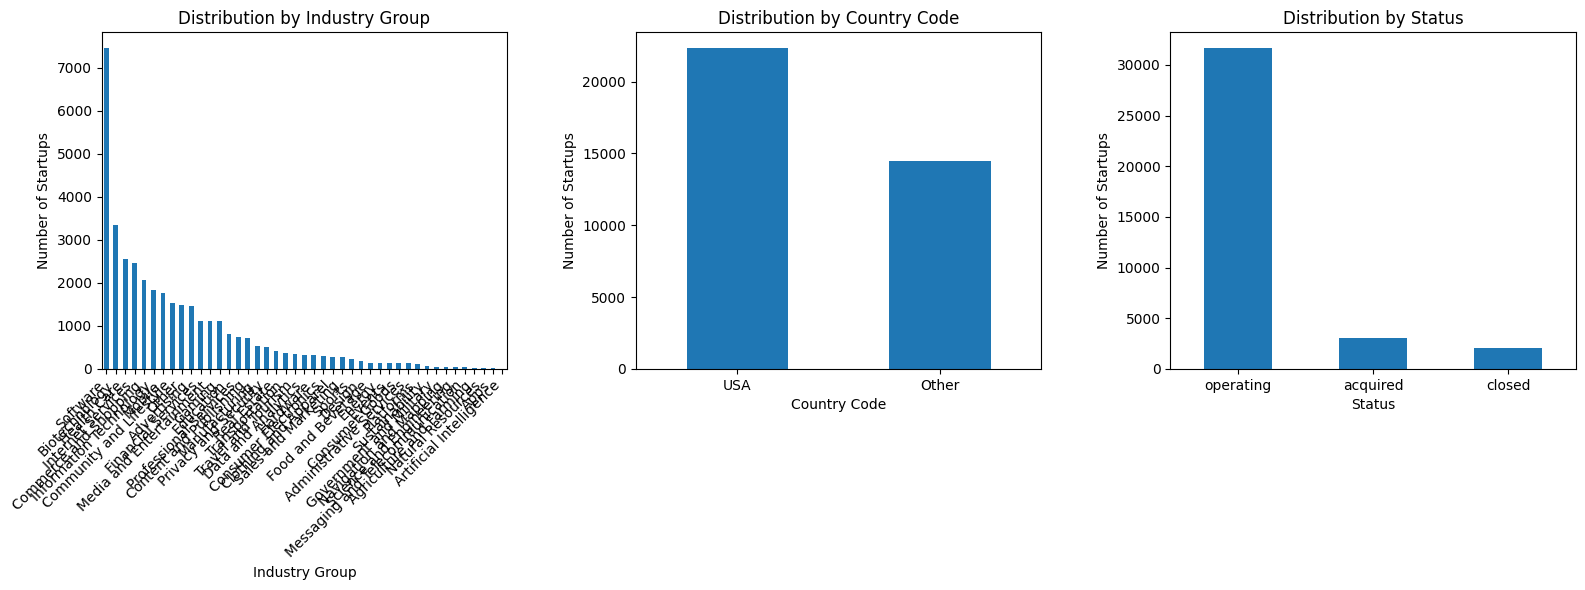

In [37]:
plt.figure(figsize=(16, 6))

# Plot distribution by Industry Group
plt.subplot(1, 3, 1)
industry_counts = data["Industry_Group"].value_counts()
industry_counts.plot(kind="bar")
plt.title("Distribution by Industry Group")
plt.xlabel("Industry Group")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45, ha="right")

# Plot distribution by Country Code
plt.subplot(1, 3, 2)
country_counts = data["country_code"].value_counts()
country_counts.plot(kind="bar")
plt.title("Distribution by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Number of Startups")
plt.xticks(rotation=0)

# Plot distribution by Status
plt.subplot(1, 3, 3)
status_counts = data["status"].value_counts()
status_counts.plot(kind="bar")
plt.title("Distribution by Status")
plt.xlabel("Status")
plt.ylabel("Number of Startups")
plt.xticks(rotation=0)

# Adjust spacing between subplots
plt.tight_layout(w_pad=4)

plt.show()

<Figure size 1000x600 with 0 Axes>

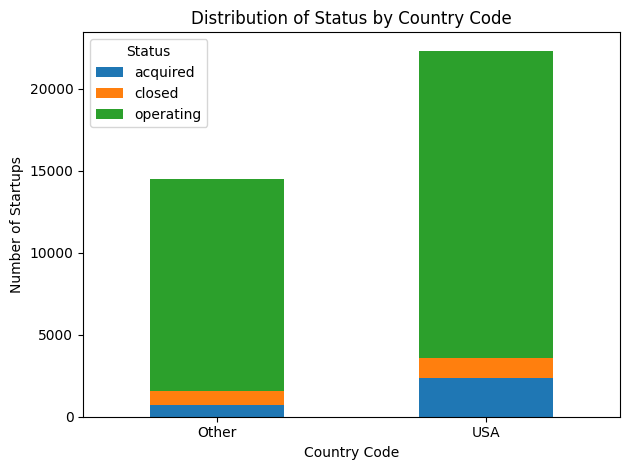

In [38]:
pivot_table = data.pivot_table(index="country_code", columns="status", values="funding_total_usd", aggfunc="count", fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind="bar", stacked=True)
plt.title("Distribution of Status by Country Code")
plt.xlabel("Country Code")
plt.ylabel("Number of Startups")
plt.xticks(rotation=0)
plt.legend(title="Status")

plt.tight_layout()
plt.show()

In [39]:
data

,funding_total_usd,status,country_code,funding_rounds,Industry_Group,time_between_first_last_funding,days_in_business
0,1750000,acquired,USA,1,Content and Publishing,0,1307
1,4000000,operating,USA,2,Gaming,111,2035
2,40000,operating,Other,1,Content and Publishing,0,1160
3,1500000,operating,Other,1,Consumer Electronics,0,1734
4,60000,operating,USA,2,Travel and Tourism,40,728
...,...,...,...,...,...,...,...
36782,320000,operating,Other,1,Education,0,1066
36783,1587301,operating,Other,1,Software,0,1368
36784,97398,operating,Other,5,Software,1044,1326
36785,9300000,operating,Other,1,Gaming,0,1500


In [40]:
rounds_threshold_us = int(data.groupby(['country_code','status'])['funding_rounds'].describe().iloc[0][1])
rounds_threshold_other = int(data.groupby(['country_code','status'])['funding_rounds'].describe().iloc[3][1])
fundings_threshold_us = data.groupby(['country_code','status'])['funding_total_usd'].describe().iloc[0][4]
fundings_threshold_other = data.groupby(['country_code','status'])['funding_total_usd'].describe().iloc[3][4]

data.loc[data['status'] == 'acquired', 'Success_failure'] = 1 
data.loc[data['status'] == 'closed', 'Success_failure'] = 0

data.loc[(data['status'] == 'operating') & (data['country_code'] == 'USA') & (data['funding_total_usd'] >= int(fundings_threshold_us)) & (data['funding_rounds'] >= int(rounds_threshold_us)), 'Success_failure'] = 1
data.loc[(data['status'] == 'operating') & (data['country_code'] == 'Other') & (data['funding_total_usd'] >= int(fundings_threshold_other)) & (data['funding_rounds'] >= int(rounds_threshold_other-1)), 'Success_failure'] = 1

data['Success_failure'] = data['Success_failure'].fillna(0)

In [41]:
encoded_data = pd.get_dummies(data, columns=["country_code"], prefix=["country"], drop_first=True)

encoded_data = pd.get_dummies(data, columns=["Industry_Group"], prefix=["industry"])


In [42]:
encoded_data.shape

(36787, 50)

In [43]:
encoded_data

,funding_total_usd,status,country_code,funding_rounds,time_between_first_last_funding,days_in_business,Success_failure,industry_Administrative Services,industry_Advertising,industry_Agriculture and Farming,...,industry_Privacy and Security,industry_Professional Services,industry_Real Estate,industry_Sales and Marketing,industry_Science and Engineering,industry_Software,industry_Sports,industry_Sustainability,industry_Transportation,industry_Travel and Tourism
0,1750000,acquired,USA,1,0,1307,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4000000,operating,USA,2,111,2035,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40000,operating,Other,1,0,1160,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500000,operating,Other,1,0,1734,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60000,operating,USA,2,40,728,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36782,320000,operating,Other,1,0,1066,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36783,1587301,operating,Other,1,0,1368,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36784,97398,operating,Other,5,1044,1326,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36785,9300000,operating,Other,1,0,1500,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
encoded_data["Success_failure"] = encoded_data["Success_failure"].astype(int)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Select numerical features for standardization
numerical_features = ["funding_total_usd", "funding_rounds", "time_between_first_last_funding", "days_in_business"]

# Initialize StandardScaler
scaler = MinMaxScaler()

# Standardize the selected features
encoded_data[numerical_features] = scaler.fit_transform(encoded_data[numerical_features])

In [51]:
encoded_data

,funding_total_usd,status,country_code,funding_rounds,time_between_first_last_funding,days_in_business,Success_failure,industry_Administrative Services,industry_Advertising,industry_Agriculture and Farming,...,industry_Privacy and Security,industry_Professional Services,industry_Real Estate,industry_Sales and Marketing,industry_Science and Engineering,industry_Software,industry_Sports,industry_Sustainability,industry_Transportation,industry_Travel and Tourism
0,0.000302,acquired,USA,0.000000,0.000000,0.103958,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000690,operating,USA,0.058824,0.016882,0.184213,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000007,operating,Other,0.000000,0.000000,0.087752,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000259,operating,Other,0.000000,0.000000,0.151031,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000010,operating,USA,0.058824,0.006084,0.040128,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36782,0.000055,operating,Other,0.000000,0.000000,0.077389,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36783,0.000274,operating,Other,0.000000,0.000000,0.110682,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36784,0.000017,operating,Other,0.235294,0.158783,0.106052,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36785,0.001603,operating,Other,0.000000,0.000000,0.125234,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
"""
encoded_data["funding_per_round"] = encoded_data["funding_total_usd"] / encoded_data["funding_rounds"]

# Define the time interval categories
bins = [-1, 30, 90, float("inf")]  # Short, Medium, Long

# Create the categorical feature
encoded_data["time_interval_category"] = pd.cut(encoded_data["time_between_first_last_funding"], bins=bins, labels=["Short", "Medium", "Long"])






encoded_data["total_duration"] = encoded_data["time_between_first_last_funding"] + 1  # Add 1 to avoid division by zero
encoded_data["funding_frequency"] = encoded_data["funding_rounds"] / encoded_data["total_duration"]
"""

'\nencoded_data["funding_per_round"] = encoded_data["funding_total_usd"] / encoded_data["funding_rounds"]\n\n# Define the time interval categories\nbins = [-1, 30, 90, float("inf")]  # Short, Medium, Long\n\n# Create the categorical feature\nencoded_data["time_interval_category"] = pd.cut(encoded_data["time_between_first_last_funding"], bins=bins, labels=["Short", "Medium", "Long"])\n\n\n\n\n\n\nencoded_data["total_duration"] = encoded_data["time_between_first_last_funding"] + 1  # Add 1 to avoid division by zero\nencoded_data["funding_frequency"] = encoded_data["funding_rounds"] / encoded_data["total_duration"]\n'

In [54]:
#correlation_matrix = encoded_data.corr()

# Create a heatmap of the correlation matrix
#plt.figure(figsize=(40, 26
                   #))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
#plt.title("Correlation Matrix")
#plt.show()

In [57]:
#from sklearn.preprocessing import LabelEncoder
# Perform label encoding for the 'status' column
#label_encoder = LabelEncoder()
#encoded_data["status_encoded"] = label_encoder.fit_transform(encoded_data["status"])

# Perform one-hot encoding for the 'country_code' column
encoded_data = pd.get_dummies(encoded_data, columns=["country_code"], prefix=["country"], drop_first=True)

In [58]:
encoded_data

,funding_total_usd,status,funding_rounds,time_between_first_last_funding,days_in_business,Success_failure,industry_Administrative Services,industry_Advertising,industry_Agriculture and Farming,industry_Apps,...,industry_Professional Services,industry_Real Estate,industry_Sales and Marketing,industry_Science and Engineering,industry_Software,industry_Sports,industry_Sustainability,industry_Transportation,industry_Travel and Tourism,country_USA
0,0.000302,acquired,0.000000,0.000000,0.103958,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000690,operating,0.058824,0.016882,0.184213,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000007,operating,0.000000,0.000000,0.087752,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000259,operating,0.000000,0.000000,0.151031,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000010,operating,0.058824,0.006084,0.040128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36782,0.000055,operating,0.000000,0.000000,0.077389,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36783,0.000274,operating,0.000000,0.000000,0.110682,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36784,0.000017,operating,0.235294,0.158783,0.106052,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36785,0.001603,operating,0.000000,0.000000,0.125234,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = encoded_data["Success_failure"]
X = encoded_data.drop(columns=["status","Success_failure"])
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
encoded_data

,funding_total_usd,status,funding_rounds,time_between_first_last_funding,days_in_business,Success_failure,industry_Administrative Services,industry_Advertising,industry_Agriculture and Farming,industry_Apps,...,industry_Professional Services,industry_Real Estate,industry_Sales and Marketing,industry_Science and Engineering,industry_Software,industry_Sports,industry_Sustainability,industry_Transportation,industry_Travel and Tourism,country_USA
0,0.000302,acquired,0.000000,0.000000,0.103958,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000690,operating,0.058824,0.016882,0.184213,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000007,operating,0.000000,0.000000,0.087752,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000259,operating,0.000000,0.000000,0.151031,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000010,operating,0.058824,0.006084,0.040128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36782,0.000055,operating,0.000000,0.000000,0.077389,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36783,0.000274,operating,0.000000,0.000000,0.110682,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36784,0.000017,operating,0.235294,0.158783,0.106052,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36785,0.001603,operating,0.000000,0.000000,0.125234,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier as the base model
base_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
base_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [62]:
# Train the model on the training data
#base_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = base_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9574612666485458


In [65]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier(random_state=42)

cv_results = cross_validate(model, X_train, y_train, cv = 5)

score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")

## Question 1 - Permutation importance
model = LogisticRegression().fit(X_train,y_train) # Fit the model

permutation_score = permutation_importance(model, X_train, y_train, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T, # Unstack results
                            columns = ['feature','feature_importance']) 

print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False) # Order by importance
importance_df

Before any feature permutation, the cross-validated accuracy is equal to 0.96


/home/janchik/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,days_in_business,0.061584
2,time_between_first_last_funding,0.037276
1,funding_rounds,0.030255
47,country_USA,0.018149
0,funding_total_usd,0.005677
9,industry_Biotechnology,0.003099
12,industry_Community and Lifestyle,0.001674
27,industry_Information Technology,0.001008
28,industry_Internet Services,0.00066
40,industry_Sales and Marketing,0.000632


In [69]:
# I want to get rid of features which caused less than this  in terms of performance
threshold = 0.01

# Decompose this one-liner piece of code step by step if you don't understand it at first sight!
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['funding_total_usd', 'industry_Biotechnology',
       'industry_Community and Lifestyle',
       'industry_Information Technology', 'industry_Internet Services',
       'industry_Sales and Marketing', 'industry_Privacy and Security',
       'industry_Advertising', 'industry_Software',
       'industry_Financial Services', 'industry_Events',
       'industry_Media and Entertainment', 'industry_Mobile',
       'industry_Content and Publishing', 'industry_Gaming',
       'industry_Design', 'industry_Sports', 'industry_Manufacturing',
       'industry_Messaging and Telecommunication',
       'industry_Food and Beverage', 'industry_Platforms',
       'industry_Hardware', 'industry_Clothing and Apparel',
       'industry_Natural Resources', 'industry_Consumer Goods',
       'industry_Navigation and Mapping',
       'industry_Government and Military',
       'industry_Administrative Services',
       'industry_Agriculture and Farming',
       'industry_Artificial Intelligence', 'indust

In [70]:
from sklearn.model_selection import cross_val_score

## Question 3 - Cross validating the model with strong features only
X_strong_features = X_train.drop(columns=list(weak_features))

print(f"Our strong features are {list(X_strong_features.columns)}")

model = RandomForestClassifier(random_state=42)

scores = cross_val_score(model, X_strong_features, y_train, cv = 5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The RandomForestClassifier fitted with the strong features only has a score of {round(strong_model_score,2)}")

Our strong features are ['funding_rounds', 'time_between_first_last_funding', 'days_in_business', 'country_USA']
Before removing weak features, the cross-validated accuracy was equal to 0.96
The RandomForestClassifier fitted with the strong features only has a score of 0.69


In [72]:
X_strong_features_test = X_test.drop(columns=list(weak_features))

model.fit(X_strong_features, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_strong_features_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6973362326719217
